In [129]:
conda install -c plotly plotly=4.8.1

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Maa\Anaconda3

  added / updated specs:
    - plotly=4.8.1


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.10.3               |   py37haa95532_0         2.9 MB
    plotly-4.8.1               |             py_0         4.7 MB  plotly
    retrying-1.3.3             |           py37_2          16 KB
    ------------------------------------------------------------
                                           Total:         7.6 MB

The following NEW packages will be INSTALLED:

  plotly             plotly/noarch::plotly-4.8.1-py_0
  retrying           pkgs/main/win-64::retrying-1.3.3-py37_2

The following packages will be UPDATED:

  conda                                       4.7.12-py37_0 --> 4.10.3-py37haa95532_0




conda-4.10.3         | 2.9 MB    |            |   0% 
conda-4.10.3       

In [96]:
import numpy as np
import math
from scipy.linalg import toeplitz
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [97]:
t = np.arange(0,math.pi/2,0.01)
h = 0.01

In [98]:
t.shape

(158,)

In [99]:
y = []

In [100]:
for i in range(158):
    y.append(math.sin(t[i]))


In [101]:
order = 0.5

In [102]:
def fgl_deriv(a,y,h):
    n = len(y)
    J = np.arange(0,n)
    G1 = []
    for i in range(len(y)):
        c = math.gamma(J[i]+1)
        G1.append(c)
    G2 = []
    for i in range(len(y)):
        d = math.gamma(a + 1 - J[i])
        G2.append(d)
    S = np.power(-1, J)
    M = np.tril(np.ones(n))
    R = toeplitz(y);
    GA = np.array(G1)
    GB = np.array(G2)
    T = np.meshgrid((math.gamma(a + 1)/np.power(h,a)) * S / (GA * GB))
    x = np.sum(R*M*T,axis=1)
    Y = np.reshape(x.reshape(len(y),1), len(y))
    return Y
    

In [103]:
p = [[]]


In [104]:
# for i in range(1,len(order)):
#     q = fgl_deriv(order[i],y,h)
#     p.append(q)

In [105]:
q = fgl_deriv(0.5,y,h)

In [106]:
# len(p)

In [107]:
len(q)

158

In [108]:
# P = np.array(p)

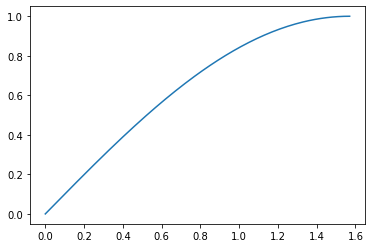

In [109]:

plt.plot(t, y)

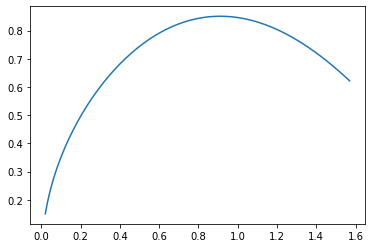

In [110]:
plt.plot(t[2:len(t)], q[2:len(q)])

In [95]:
# [o,l] = np.meshgrid(t,order)
# fig = go.Figure(data=[go.Mesh3d(
#   x=o, y=l, z=P, color='green', opacity=0.20)])
  
# fig.show()